In [95]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

In [96]:
df = pd.read_excel('BODYTEMP.xlsx', header=None,skiprows=1, names= ['ID','GENDER','SMOKE','DAY1-8AM','DAY1-12PM','DAY2-8AM','DAY2-12PM'])
df = df.dropna()

In [97]:
df.head()

,ID,GENDER,SMOKE,DAY1-8AM,DAY1-12PM,DAY2-8AM,DAY2-12PM
0,1,Male,0,98.569233,98.448539,98.413730,98.276743
1,2,Female,1,98.285684,98.884322,98.953571,98.928199
2,3,Male,0,98.142176,98.048973,97.496258,98.607047
3,4,Male,1,98.049448,98.236169,98.392317,97.877131
4,5,Male,0,97.460739,98.203946,98.429941,98.586590


In [130]:
#khoang tin cay 95%
day1_8am_mean = df['DAY1-8AM'].mean()
day1_8am_std = df['DAY1-8AM'].std()
E = 1.96 * (day1_8am_std/math.sqrt((df['DAY1-8AM'].count())))
print('trung binh mau: ', round(day1_8am_mean,3))
print(f'khoang tin cay: [{day1_8am_mean - E},{day1_8am_mean + E}]')

trung binh mau:  98.199
khoang tin cay: [98.07120014362495,98.32585457090816]


In [99]:
trungBinhNhietDoNam = df[df['GENDER'] == 'Male']
trungBinhNhietDoNu = df[df['GENDER'] == 'Female']

#khoang tin cay 95%
day2_8am_mean_nam = trungBinhNhietDoNam['DAY2-8AM'].mean()
day2_8am_std_nam = trungBinhNhietDoNam['DAY2-8AM'].std()
E = 1.96 * (day2_8am_std_nam/math.sqrt((trungBinhNhietDoNam['DAY2-8AM'].count())))
print(f'khoang tin cay cua nam: [{day2_8am_mean_nam - E},{day2_8am_mean_nam + E}]')

#khoang tin cay 95%
day2_8am_mean_nu = trungBinhNhietDoNu['DAY2-8AM'].mean()
day2_8am_std_nu = trungBinhNhietDoNu['DAY2-8AM'].std()
E = 1.96 * (day2_8am_std_nu/math.sqrt((trungBinhNhietDoNu['DAY2-8AM'].count())))
print(f'khoang tin cay cua nu: [{day2_8am_mean_nu - E},{day2_8am_mean_nu + E}]')

khoang tin cay cua nam: [98.11233716559704,98.51523110605075]
khoang tin cay cua nu: [98.22003878368983,98.55973534522573]


In [100]:
df['nhietDoTang'] = (df['DAY2-12PM'] > df['DAY1-8AM']).astype(int)
tiLeNhietDoCoTheTang = df['nhietDoTang'].mean()
print('ti le nguoi co nhiet do co the tang: ', tiLeNhietDoCoTheTang)



z = norm.ppf(0.95)
n = len(df)


E = z * (math.sqrt((tiLeNhietDoCoTheTang*(1-tiLeNhietDoCoTheTang))/n))

print(f'khoang tin cay 90% ti le nhiet do tang: : [{tiLeNhietDoCoTheTang - E},{tiLeNhietDoCoTheTang + E}]')

ti le nguoi co nhiet do co the tang:  0.7
khoang tin cay 90% ti le nhiet do tang: : [0.5934013015689181,0.8065986984310818]


In [114]:
df['nhietDoTrungBinh'] = (df['DAY1-8AM'] +df['DAY1-12PM']+df['DAY2-8AM']+df['DAY2-12PM'])/4
hutThuoc = df[df['SMOKE'] == 1].copy()
hutThuoc['nhietDoCao'] = (hutThuoc['nhietDoTrungBinh'] > 98).astype(int)
tiLeNguoiHutThuocCoNhietDoCao = hutThuoc['nhietDoCao'].mean()
z = norm.ppf(0.995)
E = z * math.sqrt((tiLeNguoiHutThuocCoNhietDoCao*(1-tiLeNguoiHutThuocCoNhietDoCao))/len(hutThuoc))
print('ti le nguoi hut thuoc co nhiet do cao: ',tiLeNguoiHutThuocCoNhietDoCao)
print(f'khoang tin cay 99% cua nguoi co nhiet do cao: [{tiLeNguoiHutThuocCoNhietDoCao - E},{tiLeNguoiHutThuocCoNhietDoCao + E}]')


ti le nguoi hut thuoc co nhiet do cao:  0.9655172413793104
khoang tin cay 99% cua nguoi co nhiet do cao: [0.8782403843225224,1.0527940984360984]


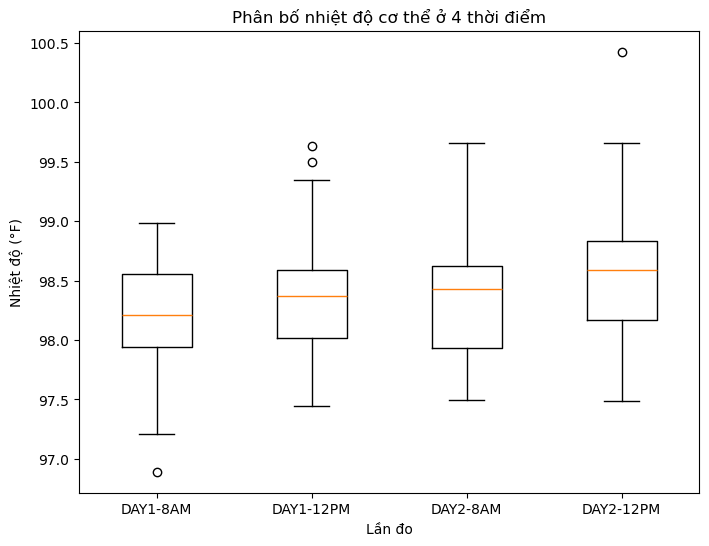

In [119]:
import matplotlib.pyplot as plt

# Các cột cần vẽ
cols = ['DAY1-8AM', 'DAY1-12PM', 'DAY2-8AM', 'DAY2-12PM']

plt.figure(figsize=(8,6))
plt.boxplot([df[c] for c in cols],labels= cols)
plt.title('Phân bố nhiệt độ cơ thể ở 4 thời điểm')
plt.xlabel('Lần đo')
plt.ylabel('Nhiệt độ (°F)')
plt.show()


In [132]:
muy = 170
sigma = 6
p_175 = 1- norm.cdf(175,muy,sigma)
print('ti le cao 175: ',p_175)



ti le cao 175:  0.20232838096364314


In [126]:
thapHon = norm.ppf(0.9,muy,sigma)
print('chieu cao ma 90% sinh vien thap hon la: ',thapHon)

chieu cao ma 90% sinh vien thap hon la:  177.6893093932676


In [127]:
tiLeSinhVienThoaiMai = norm.cdf(180,muy,sigma) - norm.cdf(160,muy,sigma)
print('ti le sinh vien ngoi thoai mai laf: ',tiLeSinhVienThoaiMai)

ti le sinh vien ngoi thoai mai laf:  0.9044192954543706
